# Visualize a filter

In [36]:

from scipy import ndimage, misc
import matplotlib.pyplot as plt

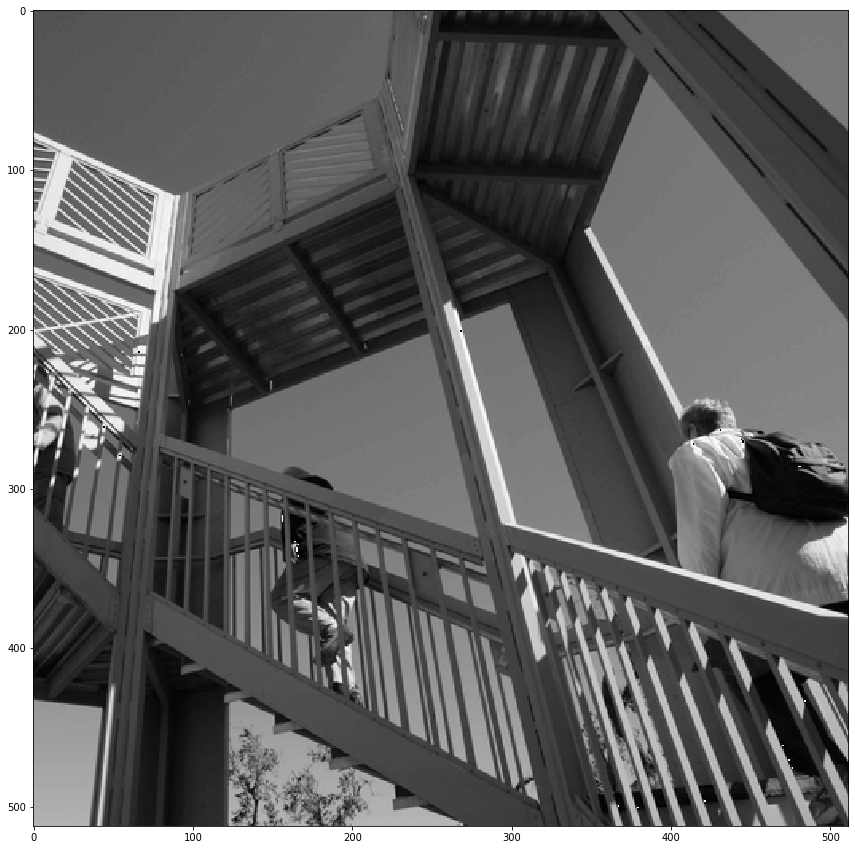

In [37]:
fig = plt.figure(figsize=(15, 15))
plt.gray()
plt.imshow(misc.ascent())

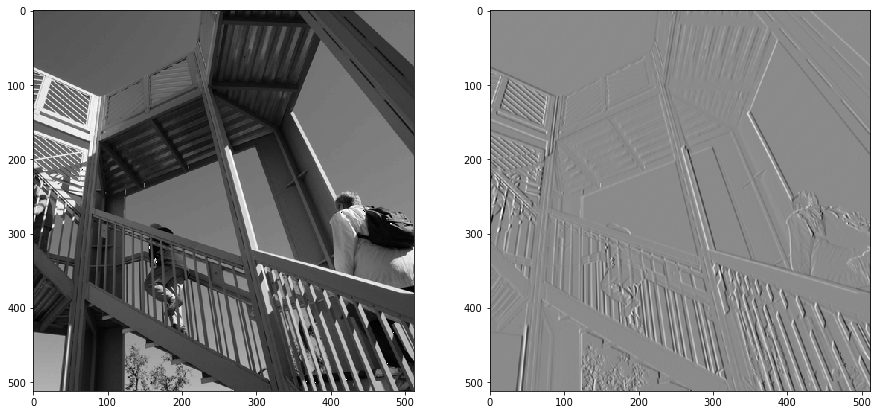

In [38]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

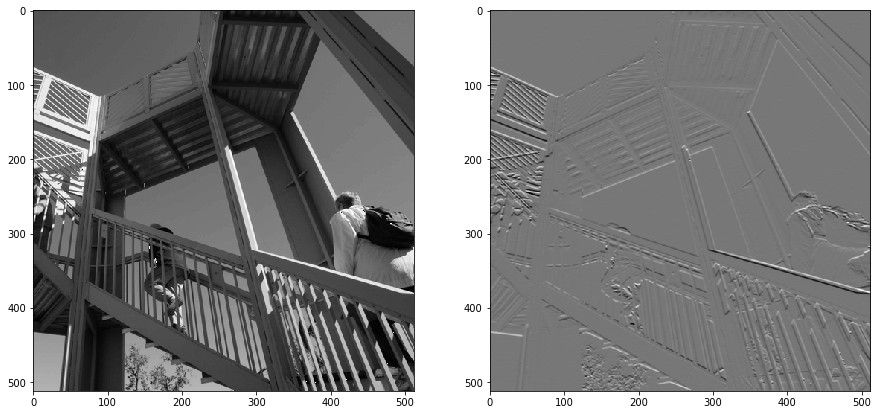

In [39]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent, axis=0)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

# Build a Model

In [40]:
# load the necessary modules

# data
from tensorflow.keras.datasets import mnist
# model
from tensorflow.keras.models import Sequential

# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation
# categorical
from tensorflow.keras.utils import to_categorical

In [41]:
# load the data
(xtrain,ytrain),(xval,yval)=mnist.load_data()

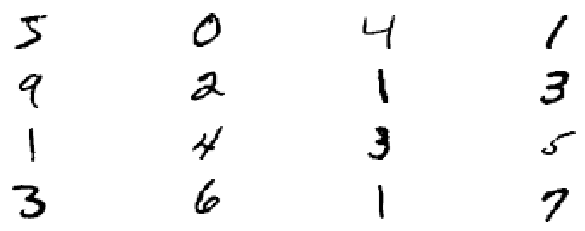

In [42]:
# inspect the data
plt.figure(figsize=(12,4))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [43]:
# reshape the data
xtrain=xtrain.reshape((60_000,28,28,1))
xval=xval.reshape((10_000,28,28,1))

In [44]:
# normalize the data  #Pixelvalue Range between zero and one
xtrain=xtrain/255
xval=xval/255

In [45]:
# convert output to categorical
ytrain=to_categorical(ytrain)
yval=to_categorical(yval)

In [27]:
# define the model
model = Sequential ([
    Conv2D(filters=16,kernel_size=(3,3),padding='same',
          input_shape =(28,28,1)),    #first layer
    MaxPool2D(pool_size=(2,2)),
    Activation('relu'),
    
    Conv2D(filters=16,kernel_size=(3,3),padding='same', #second layer
    MaxPool2D(pool_size=(2,2)),
    Activation('relu'),
           
    Dense(10),
    Activation('softmax'),
    
    ])

SyntaxError: invalid syntax (<ipython-input-27-b3a65caccb39>, line 15)

In [ ]:
# look at the model

In [26]:
# compile the model
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# fit the model
history=model.fit(x=xtrain,y=ytrain,batch_size=32,epochs=2, )

In [ ]:
# plot the accuracy
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### Let's have a look at the feature maps

In [34]:
# look at the layer by hand

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

# redefine model to output right after the first hidden layer
model_small = Model(inputs=model.inputs, outputs=model.layers[1].output)
model_small.summary()

In [ ]:
# load the image with the required shape
img = xtrain[0]
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

In [ ]:
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
img.shape

In [ ]:
# get feature map for first hidden layer
feature_maps = model_small.predict(img)
feature_maps[0]

In [12]:
# plot all 32 maps in an 4*8 squares
height = 4
width = 8
ix = 1
plt.figure(figsize=(12,4))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

NameError: name 'plt' is not defined

## Further readings

#### Stanford Ressource

https://cs231n.github.io/convolutional-networks/

#### Dive into the math behind convolutional neural networks

https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

## Visualization

#### Visualization toolbox

- https://www.youtube.com/watch?v=AgkfIQ4IGaM

- https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

#### How to visualize filters in cnns

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

#### How to visualize filters in deep layers

https://www.researchgate.net/profile/Aaron_Courville/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network/links/53ff82b00cf24c81027da530.pdf